2025-05-27 18:40:40.167603: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 18:40:40.196701: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
To get the best performance, it is recommended to adjust the number of threads by setting the environment variables OMP_NUM_THREADS, DP_INTRA_OP_PARALLELISM_THREADS, and DP_INTER_OP_PARALLELISM_THREADS. See https://deepmd.rtfd.io/parallelism/ for more information.
I0000 00:00:1748371245.476241 1087849 mlir_graph_optimization_pass.cc:401] MLIR V1 optimiza

Step 0: E_total = -26483.1878 eV, T = 572.3 K
Step 100: E_total = -26483.1892 eV, T = 6013.0 K
Step 200: E_total = -26483.1894 eV, T = 4705.4 K
Step 300: E_total = -26483.1878 eV, T = 2032.1 K
Step 400: E_total = -26483.1882 eV, T = 3717.2 K
Step 500: E_total = -26483.1897 eV, T = 4087.0 K
Step 600: E_total = -26483.1888 eV, T = 6155.7 K
Step 700: E_total = -26483.1883 eV, T = 6710.4 K
Step 800: E_total = -26483.1884 eV, T = 5075.1 K
Step 900: E_total = -26483.1884 eV, T = 3600.7 K
Step 1000: E_total = -26483.1891 eV, T = 5655.9 K
Step 1100: E_total = -26483.1889 eV, T = 4007.0 K
Step 1200: E_total = -26483.1888 eV, T = 4304.7 K
Step 1300: E_total = -26483.1871 eV, T = 1924.5 K
Step 1400: E_total = -26483.1880 eV, T = 3828.0 K
Step 1500: E_total = -26483.1874 eV, T = 3376.2 K
Step 1600: E_total = -26483.1889 eV, T = 4017.5 K
Step 1700: E_total = -26483.1872 eV, T = 3985.0 K
Step 1800: E_total = -26483.1877 eV, T = 3703.5 K
Step 1900: E_total = -26483.1892 eV, T = 6141.7 K
Step 2000: E_

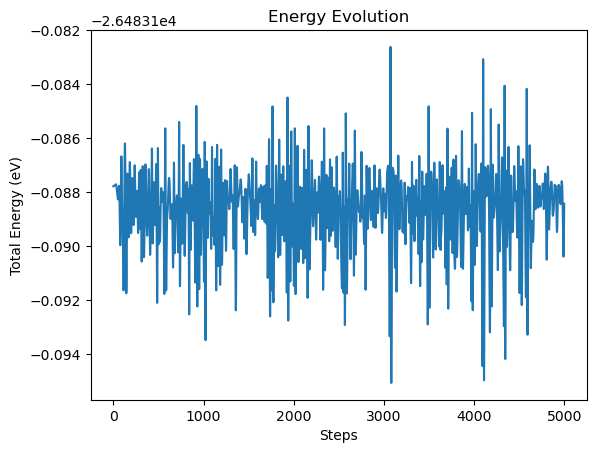

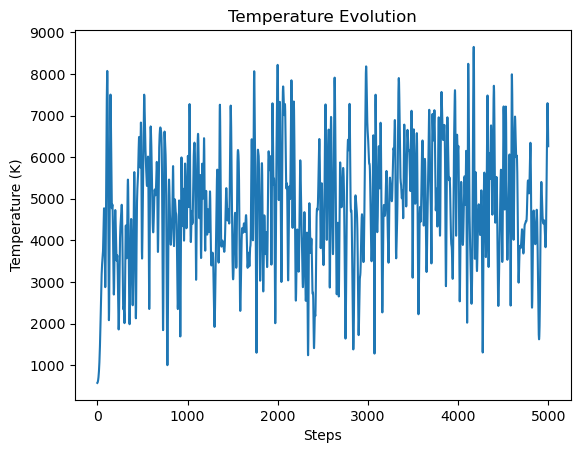

In [1]:
import ase
from ase.io import read, write
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase import units
from deepmd.calculator import DP
import matplotlib.pyplot as plt

# === 读取结构 ===
atoms = read("init.pos", format="vasp")

# === 加载 frozen_model.pb 模型 ===
dp_model = DP(model="frozen_model.pb")
atoms.set_calculator(dp_model)

# === 设置初始温度 ===
MaxwellBoltzmannDistribution(atoms, temperature_K=900)

# === 设置模拟参数 ===
dyn = VelocityVerlet(atoms, timestep=1 * units.fs)  # 1 fs 时间步
nsteps = 5000
energies = []
temperatures = []

# === 动力学循环 ===
for step in range(nsteps):
    dyn.run(1)
    epot = atoms.get_potential_energy()
    ekin = atoms.get_kinetic_energy()
    temp = ekin / (1.5 * len(atoms)) / units.kB
    energies.append(epot + ekin)
    temperatures.append(temp)
    if step % 100 == 0:
        print(f"Step {step}: E_total = {epot+ekin:.4f} eV, T = {temp:.1f} K")

# === 保存轨迹 ===
write("md_results_Cu.traj", dyn.atoms)

# === 可视化能量和温度变化 ===
plt.figure()
plt.plot(energies)
plt.xlabel("Steps")
plt.ylabel("Total Energy (eV)")
plt.title("Energy Evolution")

plt.figure()
plt.plot(temperatures)
plt.xlabel("Steps")
plt.ylabel("Temperature (K)")
plt.title("Temperature Evolution")
plt.show()
